In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import molsysmt as msm

# Get dihedral angles

## How to get any dihedral angle

Lets load a molecular systems to illustrate how MolSysMT works with the dihedral angles:

In [3]:
molecular_system = msm.convert(msm.systems['Met-enkephalin']['met_enkephalin.h5msm'], to_form='molsysmt.MolSys')

In [4]:
msm.info(molecular_system)

form,n_atoms,n_groups,n_components,n_chains,n_molecules,n_entities,n_peptides,n_structures
molsysmt.MolSys,72,5,1,1,1,1,1,1


In [5]:
view = msm.view(molecular_system)
view.clear()
view.add_ball_and_stick('all')
view

NGLWidget()

A dihedral angles is defined by three vectors $\vec{O_1E_1}$, $\vec{O_2E_2}$ y $\vec{O_3E_3}$, where $O_i$ and $E_i$ are the origin and end points of vector $i$. In molecular physics, a dihedral angle is a degree of freedom defined by three consecutive covalent bonds $\vec{O_1O_2}$, $\vec{O_2O_3}$, $\vec{O_3E_3}$ where in this context $O_1$, $O_2$, $O_3$ and $E_3$ are the position of the atoms defining the covalent chain. Thus, before showing how the dihedral angles are computed with `molsysmt.dihedral_angles`, lets have a look to the section 'How to get the covalent chains' where the methods `molsysmt.covalent_chains` and `molsysmt.covalent_dihedral_quartets` are introduced.

Lets first get all 4 atoms sequences in our molecular system covalently bound with the following names and order: C-N-CA-CB.

In [6]:
covalent_chains = msm.topology.get_covalent_chains(molecular_system, chain=['atom_name=="C"', 'atom_name=="N"',
                                                               'atom_name=="CA"', 'atom_name=="C"'])

In [7]:
covalent_chains

array([[19, 21, 23, 26],
       [26, 28, 30, 33],
       [33, 35, 37, 53],
       [53, 55, 57, 70]])

Lets have a look to the third C-N-CA-C atoms chain found in our molecular system: 

In [8]:
view = msm.view(molecular_system, viewer='NGLView')
view.clear()
selection_quartet = msm.select(molecular_system, selection=covalent_chains[2], to_syntax='NGLView')
view.add_ball_and_stick('all', color='white')
view.add_ball_and_stick(selection_quartet, color='orange')
view

NGLWidget()

The dihedral angle defined by the three consecutive vectors made by these atoms can be calculated as: 

In [9]:
dihedral_angles = msm.structure.get_dihedral_angles(molecular_system, quartets=covalent_chains[2])

In [10]:
dihedral_angles

Magnitude,[[-179.99976916196186]]
Units,degree


The method `molsysmt.covalent_chains` needs as input argument the atom names defining the dihedral angle, but you probably don't remember how $\phi$ or $\psi$ are defined. To keep it simple, MolSysMT includes a specific method named `molsysmt.covalent_dihedral_quartets` that accepts dihedral angles names as input argument:

In [11]:
covalent_chains = msm.topology.get_dihedral_quartets(molecular_system, phi=True)

In [12]:
covalent_chains

array([[19, 21, 23, 26],
       [26, 28, 30, 33],
       [33, 35, 37, 53],
       [53, 55, 57, 70]])

The input argument 'quartets' accepts a list of atoms quartets to compute the corresponding dihedral angles:

In [13]:
dihedral_angles = msm.structure.get_dihedral_angles(molecular_system, quartets=covalent_chains)

In [14]:
dihedral_angles

Magnitude,[[-179.99977050951892 -179.9997685580422 -179.99976916196186 -179.99977065567504]]
Units,degree


The output object is a numpy array with shape: (n_frames, n_angles). As it can be checked in XXX, angles in MolSysMT are expressed in degrees.

In [15]:
dihedral_angles.shape

(1, 4)

Lets add another molecular system to see the result when multiple frames are present:

In [16]:
traj_file = msm.systems['pentalanine']['traj_pentalanine.h5']
molecular_system = msm.convert(traj_file, to_form='molsysmt.MolSys')
msm.info(molecular_system)

form,n_atoms,n_groups,n_components,n_chains,n_molecules,n_entities,n_peptides,n_structures
molsysmt.MolSys,62,7,1,1,1,1,1,5000


In [17]:
phi_angles, psi_angles = msm.structure.get_dihedral_angles(molecular_system, selection='group_index==[3,4]',
                                                           phi=True, psi=True)

In [18]:
phi_angles

Magnitude,[[-72.00828391073425] [-73.23112037354619] [-149.48606697804914] ... [-140.21616576540575] [-144.87140168222828] [-161.7645815166335]]
Units,degree


We can also compute the dihedral angles for a specific set of frames:

In [19]:
phi_angles, psi_angles = msm.structure.get_dihedral_angles(molecular_system, structure_indices=range(1000),
                                                           phi=True, psi=True)

In [20]:
phi_angles.shape

(1000, 5)

Having the atoms quartets is very convenient if the method is going to be repeated multiple times. If, however, the method is going to be applied just once, the name of the dihedral angles can be introduced as the value of the input argument `dihedral_angle`.

## Ramachandran plot

In [21]:
traj_file = msm.systems['pentalanine']['traj_pentalanine.h5']
molecular_system = msm.convert(traj_file, to_form='molsysmt.MolSys')
msm.info(molecular_system)

form,n_atoms,n_groups,n_components,n_chains,n_molecules,n_entities,n_peptides,n_structures
molsysmt.MolSys,62,7,1,1,1,1,1,5000


In [22]:
phi_angles, psi_angles = msm.structure.get_dihedral_angles(molecular_system, selection='group_index==[1,2]',
                                                           phi=True, psi=True)

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_1264004/4214922723.py:8: SyntaxWarning: invalid escape sequence '\p'
  ax.set_xlabel('$\phi_1$')
/tmp/ipykernel_1264004/4214922723.py:9: SyntaxWarning: invalid escape sequence '\p'
  ax.set_ylabel('$\psi_1$')


/tmp/ipykernel_1264004/4214922723.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(x=phi_angles[:,0], y=psi_angles[:,0], shade=True)
/home/diego/Myopt/miniconda3/envs/MolSysMT@uibcdf_3.12/lib/python3.12/site-packages/pandas/core/construction.py:630: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  data = np.asarray(data)


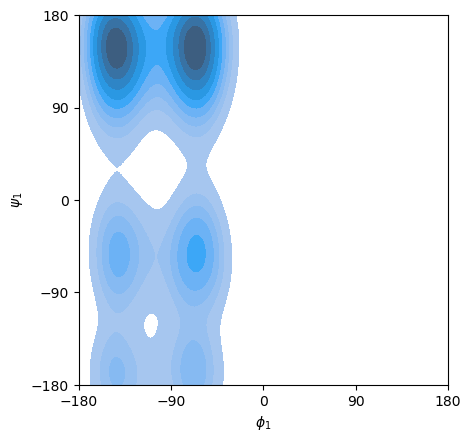

In [23]:
import seaborn as sns

ax = sns.kdeplot(x=phi_angles[:,0], y=psi_angles[:,0], shade=True)
ax.set_xlim(-180.0,180.0)
ax.set_ylim(-180.0,180.0)
ax.set_xticks([-180.0, -90.0, 0.0, 90.0, 180.0])
ax.set_yticks([-180.0, -90.0, 0.0, 90.0, 180.0])
ax.set_xlabel('$\phi_1$')
ax.set_ylabel('$\psi_1$')
ax.set_aspect('equal')